### Hierarchical Clustering using Zoo data set

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data set

df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# display's all the columns
pd.set_option('display.max_columns', None)

In [4]:
df.shape

(101, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.animal_name.nunique()

100

In [7]:
df.animal_name.unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [8]:
labels = df['class_type']
print(np.unique(labels.values))

[1 2 3 4 5 6 7]


<Axes: xlabel='class_type'>

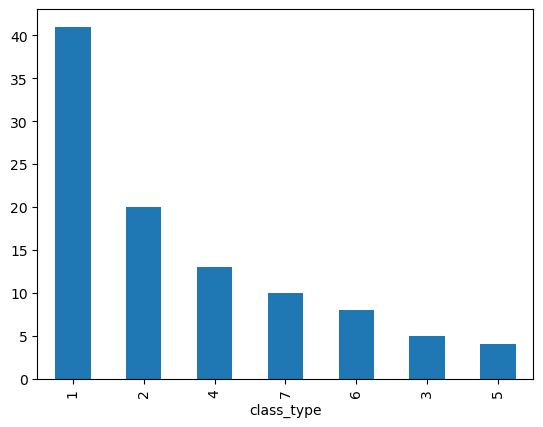

In [9]:
fig, ax = plt.subplots()
(labels.value_counts()).plot(ax=ax, kind = 'bar')

In [10]:
features = df.values[:, 1:-1] # this extracts only values
features.shape

(101, 16)

In [11]:
features

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=object)

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
from sklearn.metrics import pairwise_distances

In [14]:
model = AgglomerativeClustering(n_clusters=7, linkage='average',metric='cosine')

In [15]:
model.fit(features)

AgglomerativeClustering(linkage='average', metric='cosine', n_clusters=7)

In [16]:
model.labels_  # predicted class foreach row

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [17]:
print(np.unique(model.labels_))
# note that output will have 7 unique, as we have chosen n_clusters = 5

[0 1 2 3 4 5 6]


In [18]:
labels = labels - 1

In [19]:
print(np.unique(labels))

[0 1 2 3 4 5 6]


In [20]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [21]:
score = mean_squared_error(labels, model.labels_)

In [22]:
abs_error = np.sqrt(score)

In [23]:
print(abs_error)

2.4373333911071624


In [24]:
accuracy_score(labels, model.labels_)

0.38613861386138615

### Dendrogram

In [25]:
import scipy.cluster.hierarchy as sch

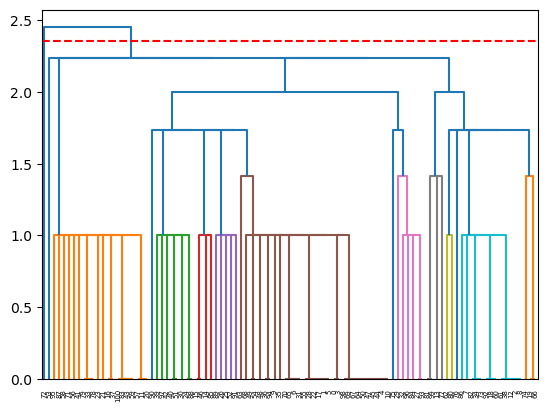

In [26]:
sch.dendrogram(sch.linkage(features, method='single'))
plt.axhline(y = 2.35, color = 'r', linestyle = '--')

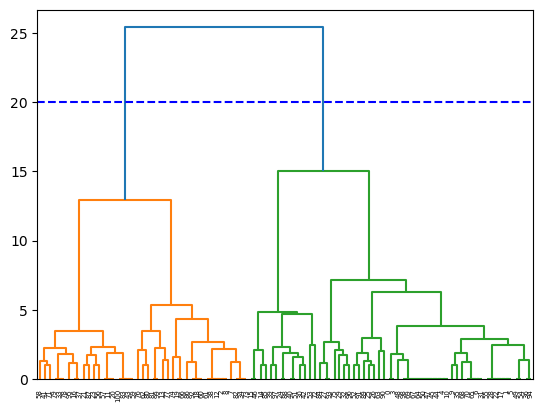

In [27]:
sch.dendrogram(sch.linkage(features, method = 'ward'))
plt.axhline(y = 20, color = 'b', linestyle = '--')

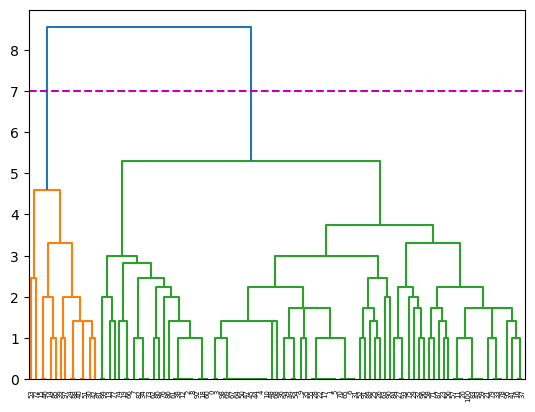

In [28]:
sch.dendrogram(sch.linkage(features, method='complete'))
plt.axhline(y = 7, c='m', linestyle='--' )
plt.show()

##### Gridsearch

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid= {'n_clusters':[2,3,4,6,7],
             'linkage':['ward','single','complete','average']
            }

In [31]:
grid = GridSearchCV(AgglomerativeClustering(), param_grid=param_grid, scoring = 'accuracy')

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
grid.fit(features)

GridSearchCV(estimator=AgglomerativeClustering(),
             param_grid={'linkage': ['ward', 'single', 'complete', 'average'],
                         'n_clusters': [2, 3, 4, 6, 7]},
             scoring='accuracy')

In [34]:
grid.best_params_

{'linkage': 'ward', 'n_clusters': 2}

In [35]:
model1 = AgglomerativeClustering()

In [36]:
model1.fit(features)

AgglomerativeClustering()

In [37]:
model1.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [38]:
methods = ['ward', 'single', 'complete','average']

Lingakage Method: ward


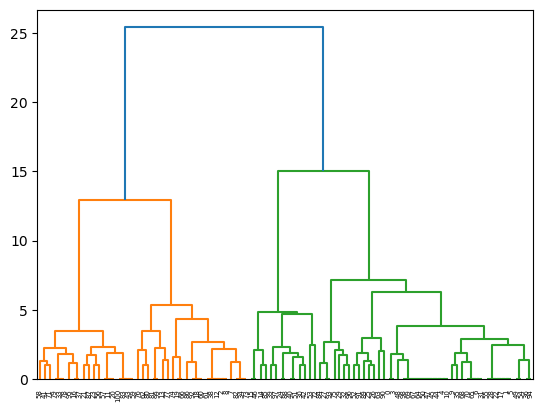

Lingakage Method: single


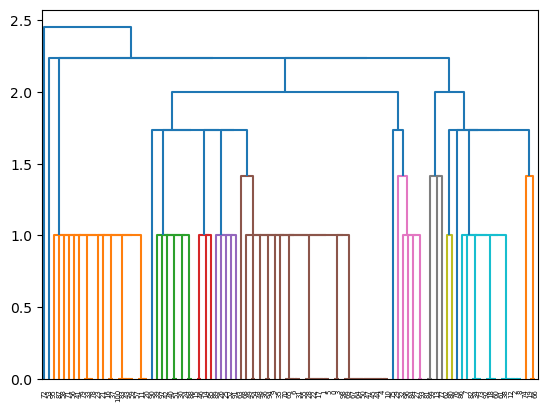

Lingakage Method: complete


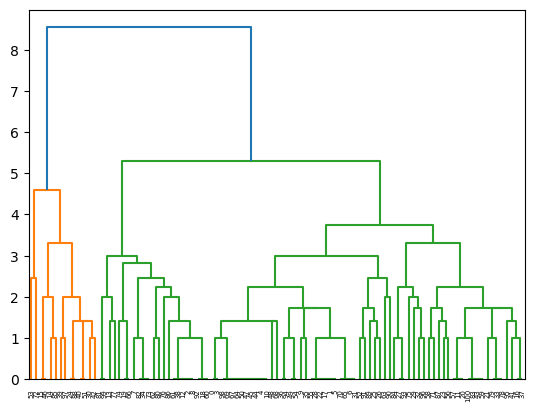

Lingakage Method: average


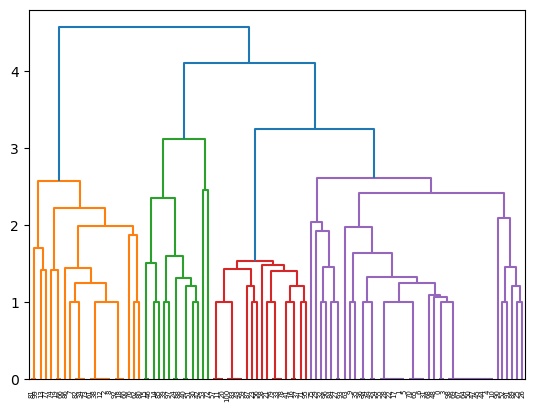

In [39]:
for linkages in methods:
    sch.dendrogram(sch.linkage(features, method=linkages))
    print("Lingakage Method:", linkages)
    plt.show()

by observing from the above dendrograms we can chose which methods we want to perform the model

### Divisive Heirarchical Clustering

scikit-learn, does not provide a built-in implementation for divisive hierarchical clustering. Scikit-learn primarily focuses on agglomerative hierarchical clustering, which is the bottom-up approach.

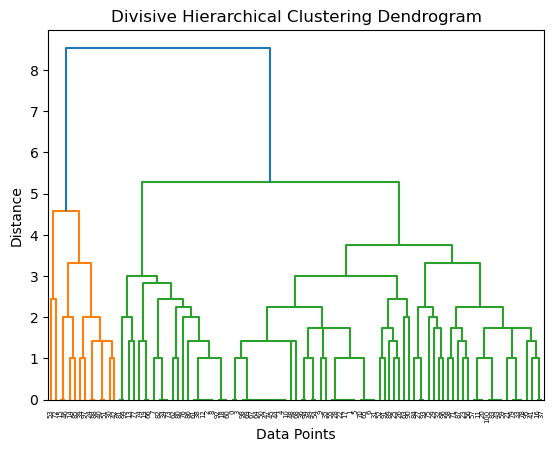

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Your data
X = features

# Perform divisive hierarchical clustering
Z = linkage(X, method='complete')  # You can choose a different linkage method

# Create a dendrogram
dendrogram(Z)

plt.title('Divisive Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

#### END